# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python 

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.30 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import pandas as pd
import random
from ddpg_agent import Agent
from collections import deque
import torch
from workspace_utils import active_session


import matplotlib.pyplot as plt
%matplotlib inline
# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [3]:
from ddpg_agent import Agent
from unityagents import UnityEnvironment
# select this option to load version 2 (with 20 agents) of the environment

env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64',no_graphics=True)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents) # initialize the score (for each agent)
i = 0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    #print(actions)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
#     print(states[0])
#     print(actions[0:2])
#     print(actions2[0:2])
    i += 1
    if i >= 4 :                                        # Exit after 4 iterations.
         break
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


In [7]:
with active_session():
    scores = []                                                   # A list to store the scores of all episodes

    # The DDPG implementation
    def ddpg(n_episodes=1000, max_t=1000, print_every=100):
        scores_deque = deque(maxlen=print_every)                  # A queue to keep only the last 100 episodes' scores
        for i_episode in range(1, n_episodes+1):
            #print("ep:", i_episode)
            env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    

            #states is an array of the states for all the 20 agents.
            states = env_info.vector_observations                 # get the current state (for each agent)
            score = np.zeros(num_agents)                          # initialize the score (for each agent)

            agent.reset()                                         # Reset the agent to start the episode
            for t in range(max_t):                                # A loop for the iterations
                actions = agent.act(states)                       # Get an action from the Actor's network, given the current state
                env_info = env.step(actions)[brain_name]          # send all actions to the environment
                next_states = env_info.vector_observations        # get next state (for each agent)
                rewards = env_info.rewards                        # get reward (for each agent)
                dones = env_info.local_done                       # see if episode finished
                score += env_info.rewards                         # update the score (for each agent)

                # Perform an agent step. The step function expects one tuple (s,a,r,ns) at a time.
                for i in range(20) :
                    agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i], t)

                states = next_states                              # Roll over states to next time step

                if np.any(dones):                                 # exit loop if episode finished
                    break

            score = score.mean()                                  # Get the mean score of the episode (over all agents)
            scores_deque.append(score)                            # Store the score in the queue
            scores.append(score)                                  # Store the score in the list (for plotting)

            # Print out the mean score per episode
            print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, score), end="")

            mean_sc = np.mean(scores_deque)                       # Compute the mean score over the last 100 episodes
            if i_episode % print_every == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_sc))

            if len(scores_deque) == 100 and mean_sc >= 30 :
                print('\rEnvironment solved in {} episodes, mean score: {:.2f}'.format(i_episode, mean_sc))
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                break

        return scores


    print("start")
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)
    scores = ddpg()
    print("end")

start
Episode 100	Average Score: 29.07
Environment solved in 103 episodes, mean score: 30.16
end


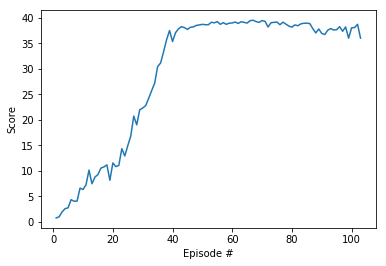

In [8]:
from matplotlib import pyplot as plt 
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()